In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./sms-spam(in).csv")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3474,ham,"Night has ended for another day, morning has c...",NaN,NaN,NaN
1694,ham,ÌÏ eatin later but i'm eatin wif my frens now ...,NaN,NaN,NaN
2228,ham,Those were my exact intentions,NaN,NaN,NaN
1093,ham,Well the weather in cali's great. But its comp...,NaN,NaN,NaN
1358,ham,If i start sending blackberry torch to nigeria...,NaN,NaN,NaN


In [6]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [7]:
df.drop(columns= ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace= True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [10]:
df.rename(columns={'v1':'results','v2':'input'}, inplace= True)

In [11]:
df.head()

,results,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df['results']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: results, Length: 5572, dtype: object

In [13]:
df['results'].value_counts()

results
ham     4825
spam     747
Name: count, dtype: int64

In [14]:
df.isnull()

,results,input
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [15]:
df.isnull().sum()

results    0
input      0
dtype: int64

In [16]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [17]:
df.duplicated().sum()

403

In [18]:
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

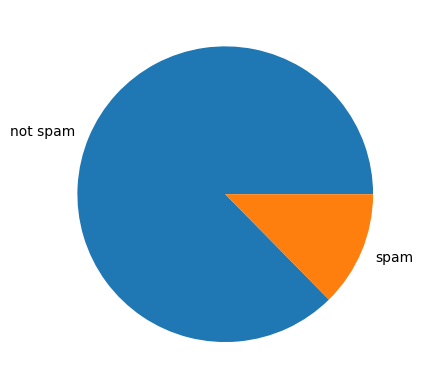

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['results'].value_counts(), labels=['not spam','spam'])
plt.show()

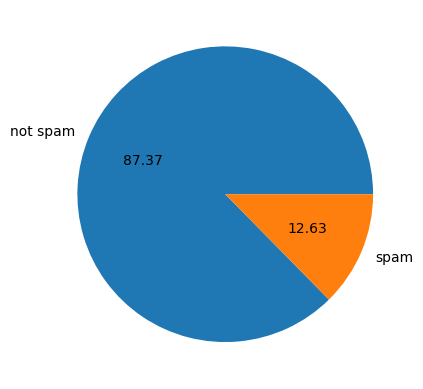

In [22]:
import matplotlib.pyplot as plt
plt.pie(df['results'].value_counts(), labels=['not spam','spam'], autopct='%0.2f')
plt.show()

In [23]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [24]:
import nltk

In [25]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\coolb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\coolb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\coolb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\coolb\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\coolb\AppData\Roaming\nltk_data...
[

True

In [26]:
df = df.replace({'ham':0,'spam':1})
from sklearn.preprocessing import LabelEncoder
#The module imported is not used not now, bur still imported
#In another way thet used some label encoder.The LabelEncoder from the sklearn.preprocessing module is used to 
# convert categorical labels into numerical values. In your case, the result column has two 
# values: "ham" and "spam". The LabelEncoder transforms these values into numerical labels, typically assigning 0 to "ham" and 1 to "spam".
#If there were three values, for example, "ham", "spam", and "maybe", the LabelEncoder would assign a unique numerical value to each category.
#we can use following to convert as alternative of code off repale,
#encoder = LabelEncoder()
#df['result'] = encoder.fit_transform(df['result' ])


C:\Users\coolb\AppData\Local\Temp\ipykernel_15520\2756195248.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'ham':0,'spam':1})


In [27]:
df

,results,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Data Preprocessing

In [28]:
#This include tokenizing words
#converting to upper case
#removing stopwords

In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\coolb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
def transform_test(text):
    text = text.lower()
    words = nltk.word_tokenize(text)
    print(words)

In [31]:
transform_test("I am Dipanshu Shamkuwar")

['i', 'am', 'dipanshu', 'shamkuwar']


In [32]:
from nltk.corpus import stopwords

In [33]:
stopwords.words("English")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
import string
nltk.download('punkt')
import string
from nltk.stem import PorterStemmer
english_stopwords = stopwords.words("English")
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    #removing special characters
    removedSC = list()
    for i in text:
        if i.isalnum():
            removedSC.append(i)
    #updating the list after removing special charcters
    text = removedSC[:]

    #removing 
    removedSWPC = list()
    for i in text:
        #string.punctuation is apart of 'string' module, containing the ASCII punctuation Chracters
        #The string.punctuation is a constant in Python's string module that contains all the ASCII punctuation characters. These characters include symbols like !, @, #, $, %, ^, &, *, (, ), and so on.
        # These are a subset of special characters specifically related to sentence structure, like ., ,, ;, !, ?. In practice, special characters often include punctuation, so filtering both might overlap.
        if i not in english_stopwords and i not in string.punctuation :
            removedSWPC.append(i)
    text = removedSWPC[:]


    #Stemming the data using 'portertStemmer' algorithm.  
    # nltk module provides this module to use
    ps = PorterStemmer()
    stemmed = list ()
    for i in text:
        stemmed.append(ps.stem(i))
    text = stemmed[:]
    return " ".join(text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\coolb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
transform_text(" (Read code first) I am Dipanshu Shamkuwar, and now everything will be lowercased. and then all the words in this sentence will be separated and joined after using .join. And stopwords will be removed")

'read code first dipanshu shamkuwar everyth lowercas word sentenc separ join use stopword remov'

In [36]:
#Creating new column in df with count of Characters
df['countCharacters']=df['input'].apply(len)

#Creating new column in df with count of Words
df['countWords']=df['input'].apply(lambda i:len(nltk.word_tokenize(i)))
#'word_tokenize' functions takes a string text as input and returns a list of words

#Creating new column in df with count of Sentences
df['countSentences']=df['input'].apply(lambda i:len(nltk.sent_tokenize(i)))
#'sent_tokenize' functions takes a string text as input and returns a list of Sentences

In [37]:
df.head()

,results,input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
#Extracting the 5 number summary of the new 3 colunm values (just descriptional, just checking statistical info)
df[['countCharacters','countWords','countSentences']].describe()

,countCharacters,countWords,countSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
#extracting the same above summaries, but now on the basis of spam and not spam

In [40]:
#for not spam
df[df['results']==0][['countCharacters','countWords','countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
#for spam
df[df['results']==1][['countCharacters','countWords','countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='countCharacters', ylabel='Count'>

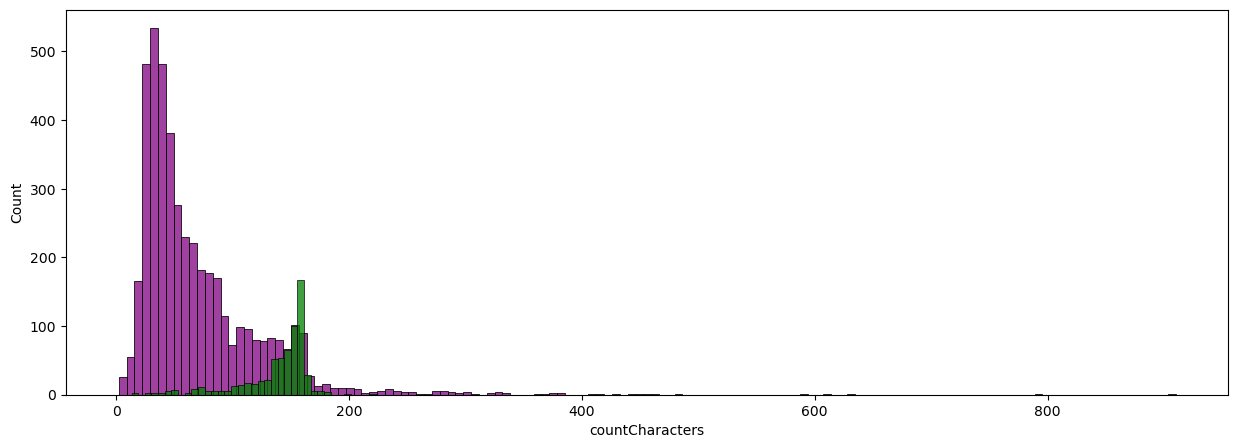

In [42]:
#for better visualization, we will plot histogram using 'seaborn'
#import matplotlib.pyplot as plt (we already did this line)
import seaborn as sns
plt.figure(figsize=(15,5))
sns.histplot(df[df['results']==0]['countCharacters'], color = "purple")
sns.histplot(df[df['results']==1]['countCharacters'], color = "green")
#The Y-Axis represents the number of messages that have a specific number of characters.


In [43]:
#Code ka Breakdown:
# Figure Size: The plt.figure(figsize=(15,5)) line sets the size of the figure to 15 inches wide and 5 inches tall.

# Histogram for "ham": The sns.histplot(df[df['results']==0]['countCharacters'], color="purple") line creates a histogram for the "ham" category (where results is 0) and colors it purple. This histogram shows the distribution of character counts for the "ham" messages.

# Histogram for "spam": The sns.histplot(df[df['results']==1]['countCharacters'], color="green") line creates a histogram for the "spam" category (where results is 1) and colors it green. This histogram shows the distribution of character counts for the "spam" messages.

# Interpretation of the Output Graph:
# X-Axis: Represents the number of characters in the messages.

# Y-Axis: Represents the frequency or count of messages with a specific number of characters.

# Purple Bars: Show the distribution of character counts for "ham" messages.

# Green Bars: Show the distribution of character counts for "spam" messages.

<Axes: xlabel='countWords', ylabel='Count'>

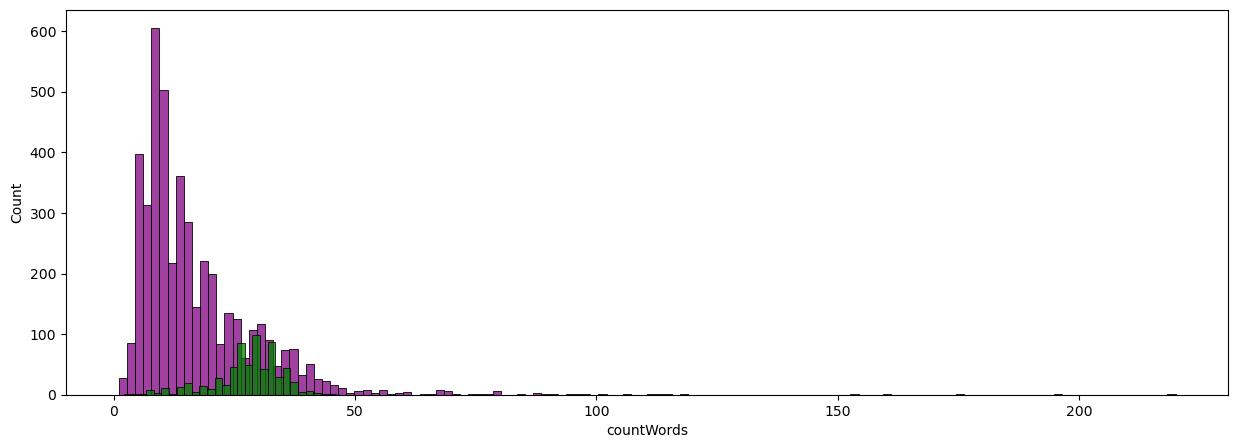

In [44]:
#Count of words now
plt.figure(figsize=(15,5))
sns.histplot(df[df['results']==0]['countWords'], color = "purple")
sns.histplot(df[df['results']==1]['countWords'], color = "green")

In [45]:
#**Obervation: - SPAM messages have more no. of cgracters used, mean is 137.89 for spam and 70.45 for not spam

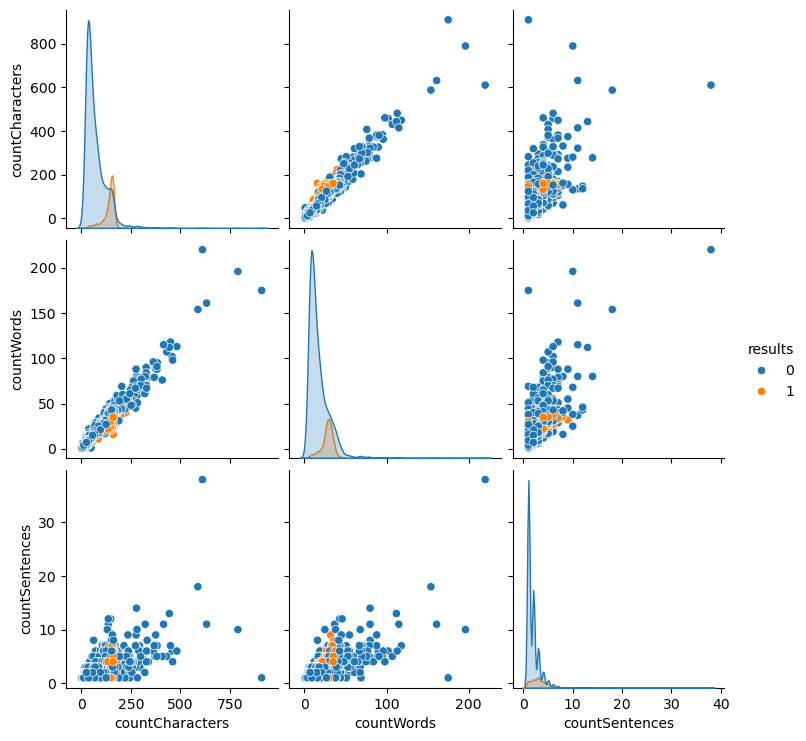

In [46]:
#finding relationship betwwen the column
sns.pairplot(df,hue='results')
#just for relationship as per tutor

In [47]:
#we will craete new column to store the transformed text 'processed'
df['processed'] = df['input'].apply(transform_text)
df.head()

,results,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
#will be creating word cloud for data visualization to display the most frequently occurring words in the processed dataset.
#using 'WordCloud' class
import nltk
%pip install wordcloud

from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

Note: you may need to restart the kernel to use updated packages.


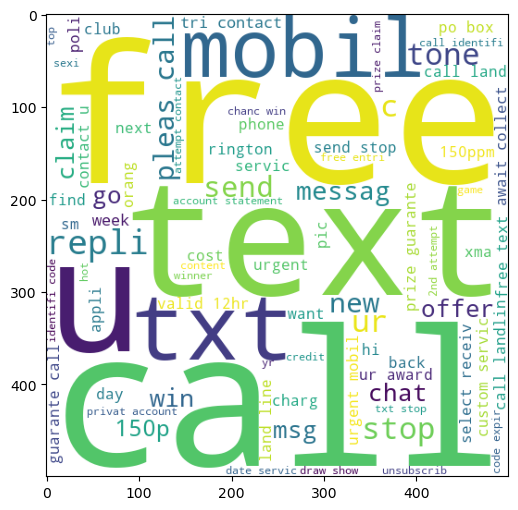

In [49]:
#creating a wordcloud for the SPAM messages
spamWC = wc.generate(df[df['results'] == 1]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

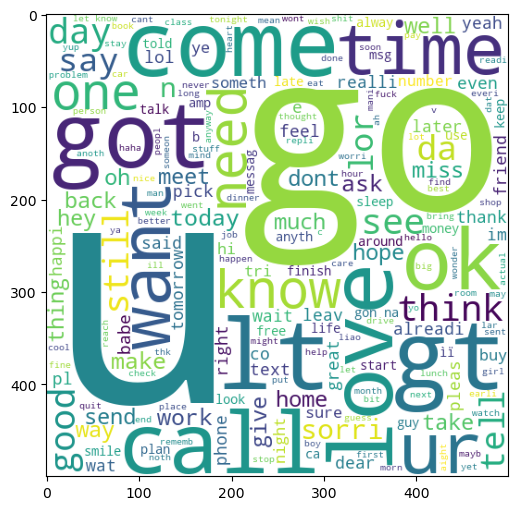

In [50]:
#creating a wordcloud for the not SPAM messages
spamWC = wc.generate(df[df['results'] == 0]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

In [51]:
#extracting the most common words used in both SPAM and not SPAM messages

In [52]:
#extracting all the words used in SPAM messages
spamWords = list()

for msg in df[df['results'] == 1]['processed'].tolist():
  for word in msg.split():
    spamWords.append(word)

spamWords

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [53]:
#to count the frequency of the words, we will be using the Counter class to create a dictionary
from collections import Counter
spamWordsDictionary = Counter(spamWords)

#to extract the most common words
spamWordsDictionary.most_common(40)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35)]

In [54]:
#converting this dictionary to a dataframe
mostCommonSPAM = pd.DataFrame(spamWordsDictionary.most_common(40))

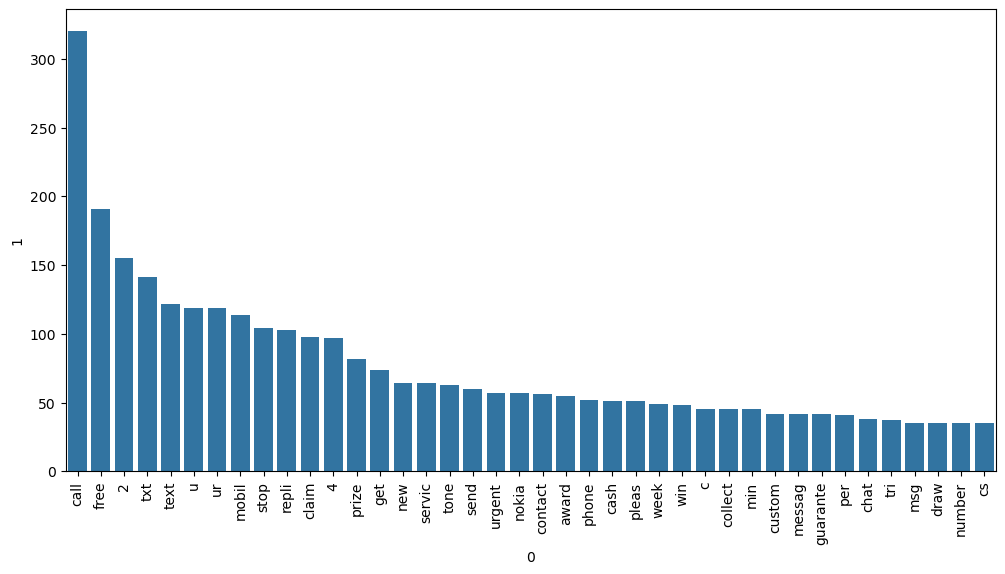

In [55]:
#plotting a bar plot of the mostCommonSPAM dataframe
plt.figure(figsize=(12, 6))
sns.barplot(data = mostCommonSPAM, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [56]:
#words like 'CALL', 'FREE', '2', 'TXT', 'TEXT', 'UR', 'MOBIL' are the most common words in SPAM texts

Model Building

In [57]:
#NaiveBayes classifier works BEST on textual data, so will firstly perform it on the dataset.

In [58]:
#we need to give numerical inputs to the classifier model, so will have to convert the 'processed' column into vectors.
#using 'bag of words'

In [59]:
#converting the collection of text into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [60]:
#transforming the data of processed column
X = cv.fit_transform(df['processed']).toarray()

#printing size of X
X.shape

(5169, 6708)

In [61]:
#storing the values of the 'result' column
y = df['results'].values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [62]:
#splitting the training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [63]:
#creating the objects for the models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [64]:
#training the dataset for GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8617021276595744
[[774 125]
 [ 18 117]]
0.4834710743801653


In [65]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9700193423597679
[[882  17]
 [ 14 121]]
0.8768115942028986


In [66]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [67]:
#we have to focus mainly on 'precision' value
#the max precision we got is 9.45 with 9.64 as accuracy

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#using 'TfidfVectorizer' for vectorization 
tf = TfidfVectorizer()

#transforming the data of processed column
X = tf.fit_transform(df['processed']).toarray()

#storing the values of the 'result' column
y = df['results'].values

#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [69]:
#training the dataset for GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8597678916827853
[[775 124]
 [ 21 114]]
0.4789915966386555


In [70]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9574468085106383
[[899   0]
 [ 44  91]]
1.0


In [71]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [72]:
#model is PREPARED.
#now we have to host the website, for that pipeling needs to be done
#the text which we will get, has to be transformed first, then vectorized and then apply the algorithm

In [73]:
#we will pickle 2 files
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))